In [2]:
##Support Vector Classifier Implementation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
##lets create synthetic data points
from sklearn.datasets import make_classification


In [6]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=1,n_redundant=0)

In [7]:
pd.DataFrame(X)[0]

0      1.992850
1      0.795810
2     -0.106282
3      1.123283
4      2.954277
         ...   
995    1.084684
996    0.619913
997    0.697157
998    1.986061
999    1.007279
Name: 0, Length: 1000, dtype: float64

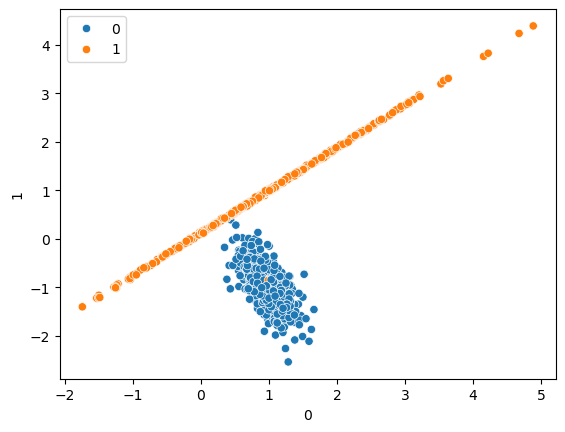

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X)

sns.scatterplot(x=df[0], y=df[1], hue=y)

plt.show()



In [9]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [11]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
y_pred=svc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       128
           1       0.99      0.99      0.99       122

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[127   1]
 [  1 121]]


In [14]:
rbf=SVC(kernel='rbf')

In [15]:
rbf.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
y_pred=rbf.predict(X_test)

In [17]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       128
           1       0.99      0.99      0.99       122

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[127   1]
 [  1 121]]


In [18]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
y_pred1=polynomial.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       128
           1       0.99      0.99      0.99       122

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[112  16]
 [  1 121]]


In [19]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred2=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       128
           1       0.99      0.99      0.99       122

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[ 99  29]
 [ 19 103]]


In [20]:
##hyperparameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV
##defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

In [22]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [24]:
print(grid)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)


In [25]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       128
           1       0.99      0.99      0.99       122

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[ 99  29]
 [ 19 103]]


In [26]:
##svm kernels indepth intuition and prectical implementation
import numpy as np
import pandas as pd
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [27]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

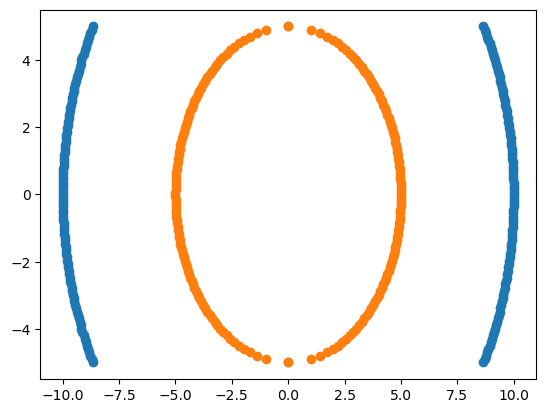

In [28]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.show()


In [29]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.vstack([y, x]).T, columns=["X1", "X2"])
df1["Y"] = 0

df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=["X1", "X2"])
df2["Y"] = 1

df = pd.concat([df1, df2], ignore_index=True)

df.head(5)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [30]:
X=df.iloc[:,:2]
y=df.Y

In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [33]:
X_train

,X1,X2
157,-9.971263,-0.757576
109,-9.124936,4.090909
17,9.445795,-3.282828
347,-4.993619,0.252525
24,9.662581,-2.575758
...,...,...
71,9.761334,2.171717
106,-8.982945,4.393939
270,4.551063,2.070707
348,-4.997704,0.151515


In [34]:
##we need to find components for the polynomial kernel
##X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=(df['X1']*df['X2'])
df.head()



,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [36]:
X=df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y=df['Y']

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
247,4.993619,-0.252525,24.936231,0.063769,-1.261015
110,-9.169553,3.989899,84.080706,15.919294,-36.585591
16,9.410082,-3.383838,88.549638,11.450362,-31.842196
66,9.860133,1.666667,97.222222,2.777778,16.433555
153,-9.993749,-0.353535,99.875013,0.124987,3.533143
...,...,...,...,...,...
71,9.761334,2.171717,95.283645,4.716355,21.198857
106,-8.982945,4.393939,80.693297,19.306703,-39.470515
270,4.551063,2.070707,20.712172,4.287828,9.423918
348,-4.997704,0.151515,24.977043,0.022957,-0.757228


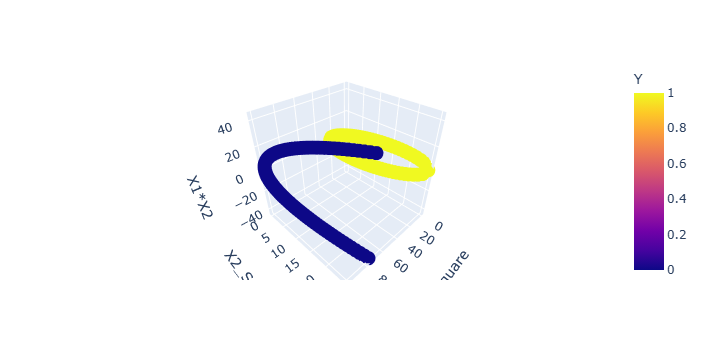

In [50]:
import plotly.express as px
fig=px.scatter_3d(df,x="X1_Square",y="X2_Square",z="X1*X2",color="Y")
fig.show()

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

accuracy_score(y_test,y_pred)


1.0

In [52]:
print("y_test:", len(y_test))
print("y_pred:", len(y_pred))


y_test: 100
y_pred: 250


In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel='sigmoid')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

accuracy_score(y_test,y_pred)


1.0

In [ ]:
##support vector regression implementation


In [56]:
##dataset(tips dataset)
import seaborn as sns
df=sns.load_dataset('tips')


In [57]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [59]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [60]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [61]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [62]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [ ]:
##feautre encoding (label encoding and onehot encoding)


In [63]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [67]:
##independent and dependent features
X=df[['tip','sex','smoker','day','time','size']]
y=df['total_bill']


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [69]:
X_train.head()

,tip,sex,smoker,day,time,size
115,3.50,Female,No,Sun,Dinner,2
181,5.65,Male,Yes,Sun,Dinner,2
225,2.50,Female,Yes,Fri,Lunch,2
68,2.01,Male,No,Sat,Dinner,2
104,4.08,Female,No,Sat,Dinner,2


In [71]:
## feautre encoding (label encoding and onehot encoding)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()


In [74]:
import warnings
warnings.filterwarnings('ignore')
X_train['sex']=le1.fit_transform(X_train['sex'])
X_train['smoker']=le2.fit_transform(X_train['smoker'])
X_train['time']=le3.fit_transform(X_train['time'])

In [75]:
X_test['sex']=le1.fit_transform(X_test['sex'])
X_test['smoker']=le2.fit_transform(X_test['smoker'])
X_test['time']=le3.fit_transform(X_test['time'])

In [76]:
X_test.head()

,tip,sex,smoker,day,time,size
24,3.18,1,0,Sat,0,2
6,2.00,1,0,Sun,0,2
153,2.00,1,0,Sun,0,4
211,5.16,1,1,Sat,0,4
198,2.00,0,1,Thur,1,2


In [77]:
##onehot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [86]:
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),3)],
                                  remainder='passthrough')

In [89]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
X_train = X_train.to_frame()

ct.fit_transform(X_train)

AttributeError: 'DataFrame' object has no attribute 'to_frame'